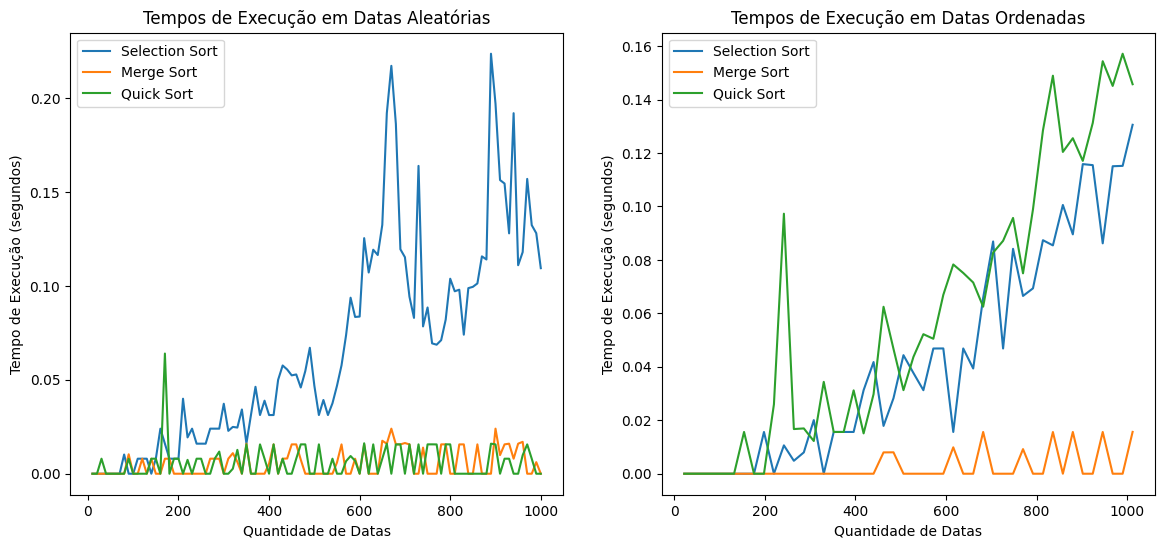

In [3]:
import matplotlib.pyplot as plt
import time

#Função para ler as datas nos arquivos txt
def ler_datas_de_arquivo(arquivo_nome):
    datas = []
    with open(arquivo_nome, "r") as arquivo:
        for linha in arquivo:
            datas.append(linha.strip())
    return datas

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        less = [x for x in arr[1:] if x <= pivot]
        greater = [x for x in arr[1:] if x > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)    # Implementação do QuickSort
    pass

#Implementação do MergeSort
def mergesort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        mergesort(left_half)
        mergesort(right_half)

        i = 0
        j = 0
        k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

#Implementação do SelectionSort
def selectionsort(arr):
    for i in range(len(arr)):
        min_index = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

#Função para medir o tempo do algoritmo
def medir_tempo_ordenacao(algoritmo, dados):
    inicio = time.time()
    algoritmo(dados)
    fim = time.time()
    return fim - inicio

#Criar um loop para rodar todos os arquivos das datas
nomes_arquivos = []
for i in range (10,1001,10):
    nomes_arquivos.append(f"datas_aleatorias/Arquivo_Aleatorio_{i}.txt")


nomes_arquivos_ordenados = []
for i in range (22,1024,22):
    nomes_arquivos_ordenados.append(f"datas_ordenadas/Arquivo_Ordenado_{i}.txt")




# Dicionários para armazenar os tempos de execução
tempos_merge = {}
tempos_selection = {}
tempos_quick = {}

def testar_tempo_aleatorios():
    # Loop para testar cada arquivo
    for arquivo_nome in nomes_arquivos:
        datas_aleatorias = ler_datas_de_arquivo(arquivo_nome)

        # Copiar as datas para ordenação
        datas_merge = datas_aleatorias.copy()
        datas_selection = datas_aleatorias.copy()
        datas_quick = datas_aleatorias.copy()

        # Medir o tempo de ordenação com Bubble Sort
        tempo_merge = medir_tempo_ordenacao(mergesort, datas_merge)

        # Medir o tempo de ordenação com Merge Sort
        tempo_selection = medir_tempo_ordenacao(selectionsort, datas_selection)

        # Medir o tempo de ordenação com Quick Sort
        tempo_quick = medir_tempo_ordenacao(quicksort, datas_quick)

        # Armazenar os tempos de execução em dicionários
        qtd_linhas = len(datas_aleatorias)
        tempos_merge[qtd_linhas] = tempo_merge
        tempos_selection[qtd_linhas] = tempo_selection
        tempos_quick[qtd_linhas] = tempo_quick
testar_tempo_aleatorios()
tempos_merge_ordenados = {}
tempos_selection_ordenados = {}
tempos_quick_ordenados = {}
def testar_tempo_ordenado():
     # Loop para testar cada arquivo
    for arquivo_nome in nomes_arquivos_ordenados:
        datas_aleatorias = ler_datas_de_arquivo(arquivo_nome)

        # Copiar as datas para ordenação
        datas_merge = datas_aleatorias.copy()
        datas_selection = datas_aleatorias.copy()
        datas_quick = datas_aleatorias.copy()

        # Medir o tempo de ordenação com Bubble Sort
        tempo_merge_ordenado = medir_tempo_ordenacao(mergesort, datas_merge)

        # Medir o tempo de ordenação com Merge Sort
        tempo_selection_ordenado = medir_tempo_ordenacao(selectionsort, datas_selection)

        # Medir o tempo de ordenação com Quick Sort
        tempo_quick_ordenado = medir_tempo_ordenacao(quicksort, datas_quick)

        # Armazenar os tempos de execução em dicionários
        qtd_linhas = len(datas_aleatorias)
        tempos_merge_ordenados[qtd_linhas] = tempo_merge_ordenado
        tempos_selection_ordenados[qtd_linhas] = tempo_selection_ordenado
        tempos_quick_ordenados[qtd_linhas] = tempo_quick_ordenado
testar_tempo_ordenado()
plt.figure(figsize=(14, 6))

# Gráfico 1 - Tempos de execução em datas aleatórias
plt.subplot(1, 2, 1)
plt.plot(list(tempos_selection.keys()), list(tempos_selection.values()), label="Selection Sort")
plt.plot(list(tempos_merge.keys()), list(tempos_merge.values()), label="Merge Sort")
plt.plot(list(tempos_quick.keys()), list(tempos_quick.values()), label="Quick Sort")
plt.xlabel("Quantidade de Datas")
plt.ylabel("Tempo de Execução (segundos)")
plt.legend()
plt.title("Tempos de Execução em Datas Aleatórias")

# Gráfico 2 - Tempos de execução em datas ordenadas
plt.subplot(1, 2, 2)
plt.plot(list(tempos_selection_ordenados.keys()), list(tempos_selection_ordenados.values()), label="Selection Sort")
plt.plot(list(tempos_merge_ordenados.keys()), list(tempos_merge_ordenados.values()), label="Merge Sort")
plt.plot(list(tempos_quick_ordenados.keys()), list(tempos_quick_ordenados.values()), label="Quick Sort")
plt.xlabel("Quantidade de Datas")
plt.ylabel("Tempo de Execução (segundos)")
plt.legend()
plt.title("Tempos de Execução em Datas Ordenadas")

plt.show()
